# Machine Learning for Bank Marketing: Predicting Term Deposit Subscriptions


# Introduction

# Predicting Bank Term Deposit Subscriptions Using Scikit-Learn: A Machine Learning Approach

#Marketing to the right customers remains a key challenge for banks. With the rise of machine learning, financial institutions can now use data-driven strategies to target specific demographics more accurately. In this project, I explore how a Portuguese bank can apply predictive analytics to identify clients most likely to subscribe to a term deposit. Using data from past phone-based marketing campaigns, I build a classification model to predict customer subscription behavior, helping the bank focus its marketing efforts more efficiently.

# Dataset

#The dataset used in this project is sourced from the direct marketing campaigns of a Portuguese banking institution. These campaigns were conducted via phone calls, with the aim of convincing clients to subscribe to a term deposit. The data is stored in a CSV file within the bank-additional.zip archive and contains 41,188 records with 21 attributes, including both numeric and categorical variables.

Each row represents a marketing contact with a client and includes information such as:

Client data (e.g., age, job, marital status, education)

Last contact details (e.g., contact duration, day, month)

Campaign-related information (e.g., number of contacts, previous outcomes)

Socio-economic context (e.g., employment variation rate, consumer confidence)

The target variable, y, indicates whether the client subscribed to the term deposit (yes or no). This binary classification problem is ideal for testing various machine learning models to predict future client behavior based on past campaign data.

Source:https://archive.ics.uci.edu/ml/machine-learning-databases/00222/ 

Dataset has 40,000+ rows of data.

 In this project, I will demonstrate how to build a machine learning model in Python to predict whether clients will subscribe to a bank's term deposit. The process will follow a structured pipeline consisting of the following steps:

Data Loading and Exploration – Importing the dataset and performing initial exploratory data analysis (EDA) to understand its structure and content.

Data Preprocessing – Handling missing values, encoding categorical variables, and preparing the data for modeling.

Feature Selection – Identifying the most relevant features that influence client subscription decisions.

Model Building – Applying classification algorithms such as Logistic Regression, Decision Trees, or Random Forest using Scikit-learn.

Model Evaluation – Assessing model performance using metrics like accuracy, precision, recall, F1-score, and the confusion matrix.

Conclusion and Insights – Interpreting results to provide actionable insights that can help improve targeted marketing strategies.



# Project Definition
  
  The primary goal of this project is to develop a classification model that can predict whether a client will subscribe to a bank's term deposit. The target variable is binary: "yes" if the client subscribes to the deposit and "no" if the client does not.

# Data Exploration
  
  Loading the Dataset. Load the dataset into a DataFrame using libraries such as Pandas (in Python).Explore the first few rows of the data to get a sense of the structure and type of information available.




In [18]:
import pandas as pd
#load the CSV file
df = pd.read_csv('bank-additional-full.csv')


In [19]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [21]:
print ('Number of samples: ',len(df))

Number of samples:  41188


In [22]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [23]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [24]:
#count the number of rows for each type
df.groupby('y').size()

y
no     36548
yes     4640
dtype: int64

In [25]:
df['OUTPUT_LABEL'] = (df.y == 'yes').astype('int')


In [26]:
def calc_prevalence(y_actual):
    # this function calculates the prevalence of the positive class (label = 1)
    return (sum(y_actual)/len(y_actual))
print('prevalence of the positive class: %.4f'%calc_prevalence(df['OUTPUT_LABEL'].values))

prevalence of the positive class: 0.1127


In [27]:
df[list(df.columns)[:15]].head() #exploring dataset using unique values

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent


In [28]:
df[list(df.columns)[15:]].head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,OUTPUT_LABEL
0,1.1,93.994,-36.4,4.857,5191.0,no,0
1,1.1,93.994,-36.4,4.857,5191.0,no,0
2,1.1,93.994,-36.4,4.857,5191.0,no,0
3,1.1,93.994,-36.4,4.857,5191.0,no,0
4,1.1,93.994,-36.4,4.857,5191.0,no,0


In [29]:
df.info()
print('Number of columns:',len(df.columns))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [30]:
# for each column
for a in list(df.columns):
    
    # get a list of unique values
    n = df[a].unique()
    
    # if number of unique values is less than 20, print the values. Otherwise print the number of unique values
    if len(n)<20:
        print(a)
        print(n)
    else:
        print(a + ': ' +str(len(n)) + ' unique values')

age: 78 unique values
job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital
['married' 'single' 'divorced' 'unknown']
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default
['no' 'unknown' 'yes']
housing
['no' 'yes' 'unknown']
loan
['no' 'yes' 'unknown']
contact
['telephone' 'cellular']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']
duration: 1544 unique values
campaign: 42 unique values
pdays: 27 unique values
previous
[0 1 2 3 4 5 6 7]
poutcome
['nonexistent' 'failure' 'success']
emp.var.rate
[ 1.1  1.4 -0.1 -0.2 -1.8 -2.9 -3.4 -3.  -1.7 -1.1]
cons.price.idx: 26 unique values
cons.conf.idx: 26 unique values
euribor3m: 316 unique values
nr.employed
[5191.  5228.1 5195.8 5176.3 5099.1 5076.2 5017.5 5023.5 5008.7 4991.6
 4963.6]
y
['no' 'ye

# Feature Engineering: Predicting Bank Term Deposit Subscription
Feature engineering is the process of transforming raw data into features that better represent the underlying problem and improve the model's performance. Below are various feature engineering techniques tailored to the "bank term deposit subscription" project.

In [31]:
#Numerical Features
colms_num = ['campaign', 'pdays',
       'previous', 'emp.var.rate', 'cons.price.idx','cons.conf.idx', 'nr.employed','age','euribor3m']
df[colms_num].head()

,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,age,euribor3m
0,1,999,0,1.1,93.994,-36.4,5191.0,56,4.857
1,1,999,0,1.1,93.994,-36.4,5191.0,57,4.857
2,1,999,0,1.1,93.994,-36.4,5191.0,37,4.857
3,1,999,0,1.1,93.994,-36.4,5191.0,40,4.857
4,1,999,0,1.1,93.994,-36.4,5191.0,56,4.857


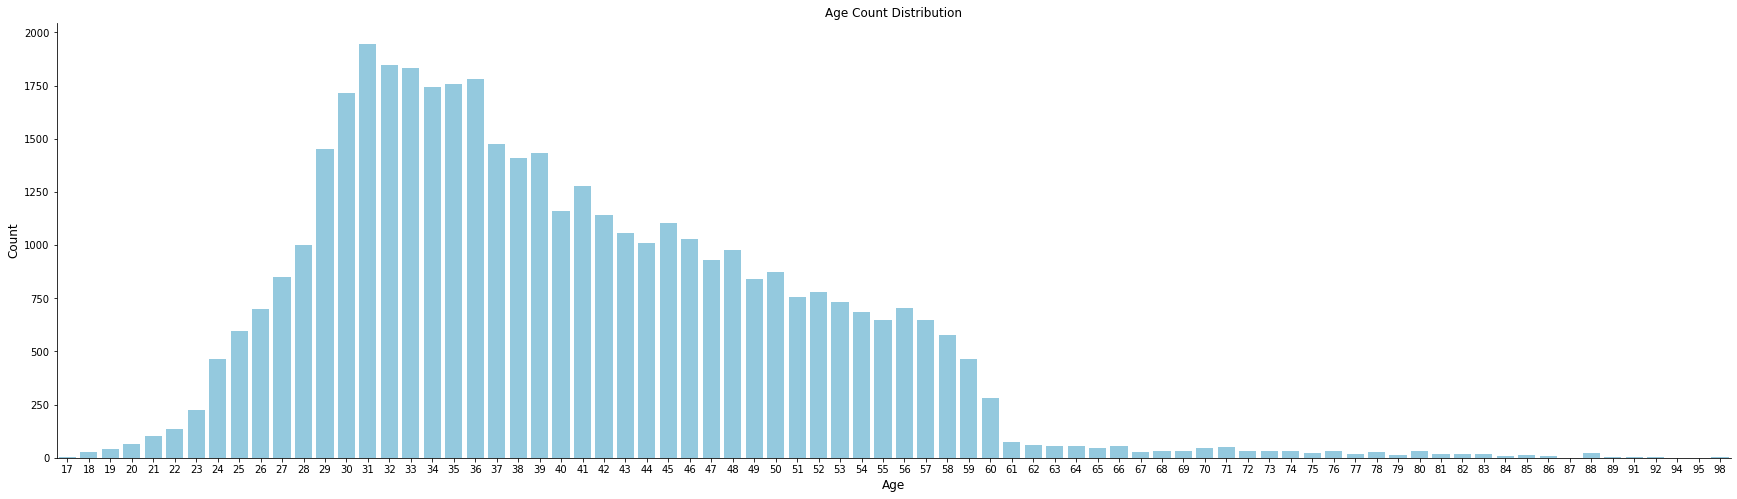

In [32]:
#Graphical Representation of Numerical Features

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')
fig, ax = plt.subplots()
fig.set_size_inches(30,8)
sns.countplot(x = 'age', data =  df[colms_num], color='skyblue', ax=ax)
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Age Count Distribution', fontsize=12)
sns.despine()

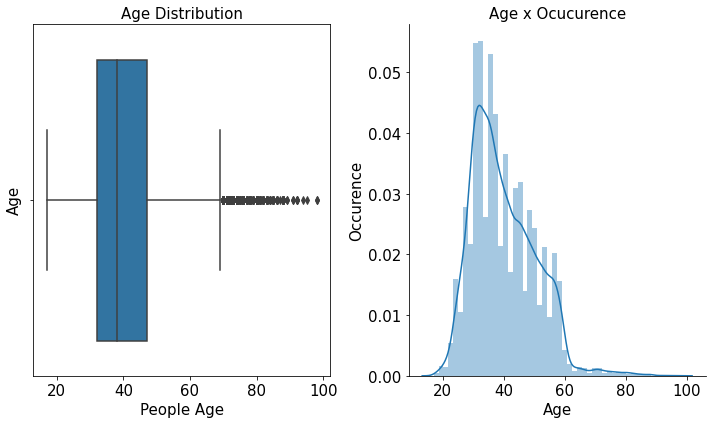

In [33]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 6))
sns.boxplot(x = 'age', data = df[colms_num], orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(df[colms_num]['age'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Age x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)
plt.tight_layout() 

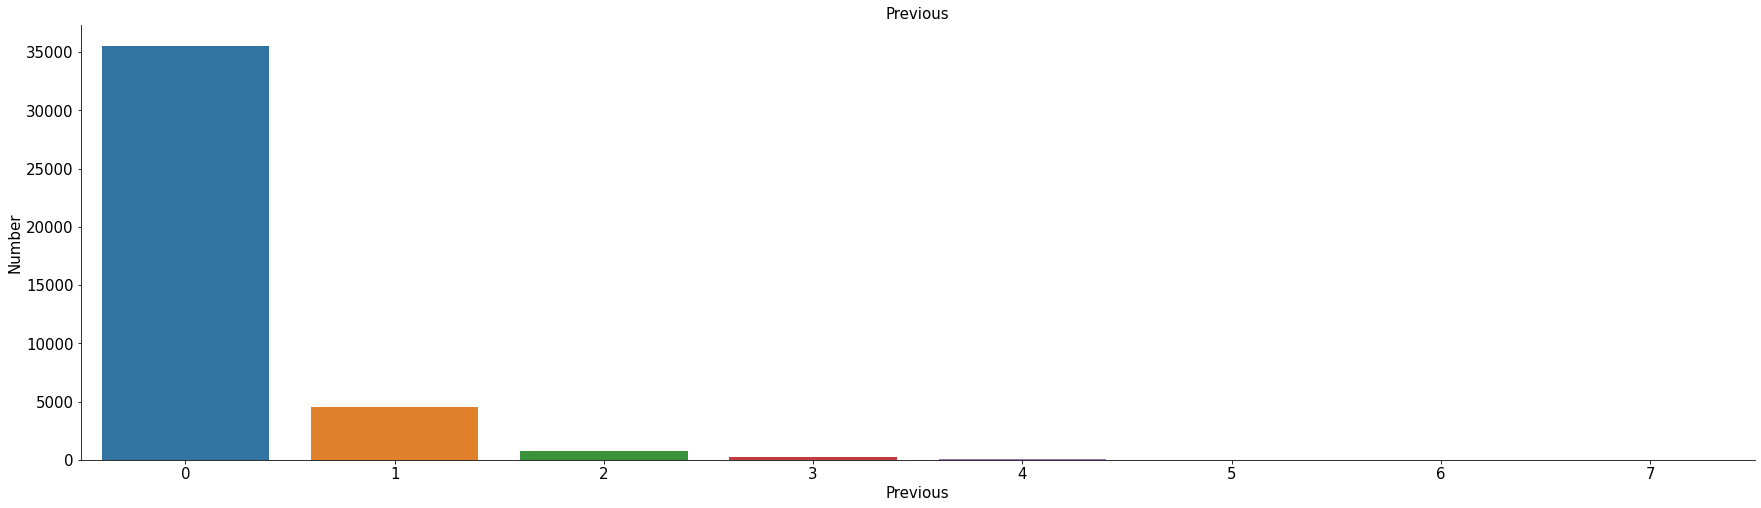

In [34]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 8)
sns.countplot(x = 'previous', data = df[colms_num])
ax.set_xlabel('Previous', fontsize=15)
ax.set_ylabel('Number', fontsize=15)
ax.set_title('Previous', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

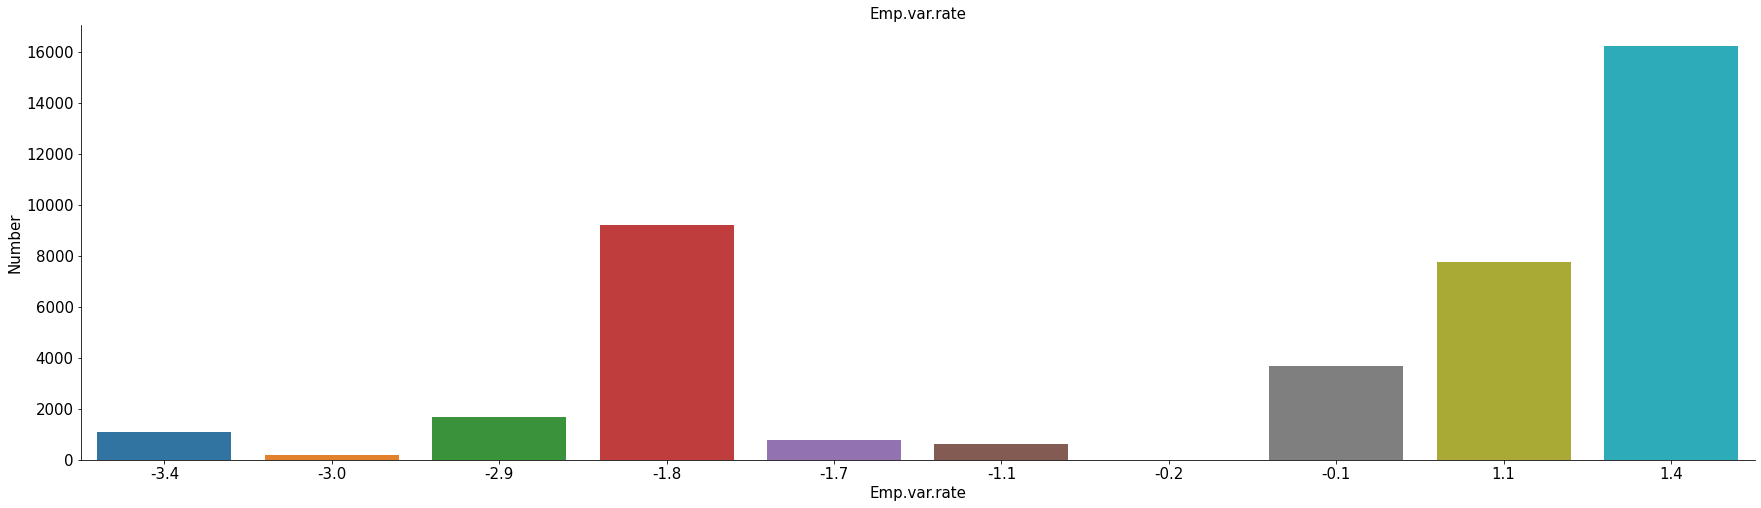

In [35]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 8)
sns.countplot(x = 'emp.var.rate', data = df[colms_num])
ax.set_xlabel('Emp.var.rate', fontsize=15)
ax.set_ylabel('Number', fontsize=15)
ax.set_title('Emp.var.rate', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

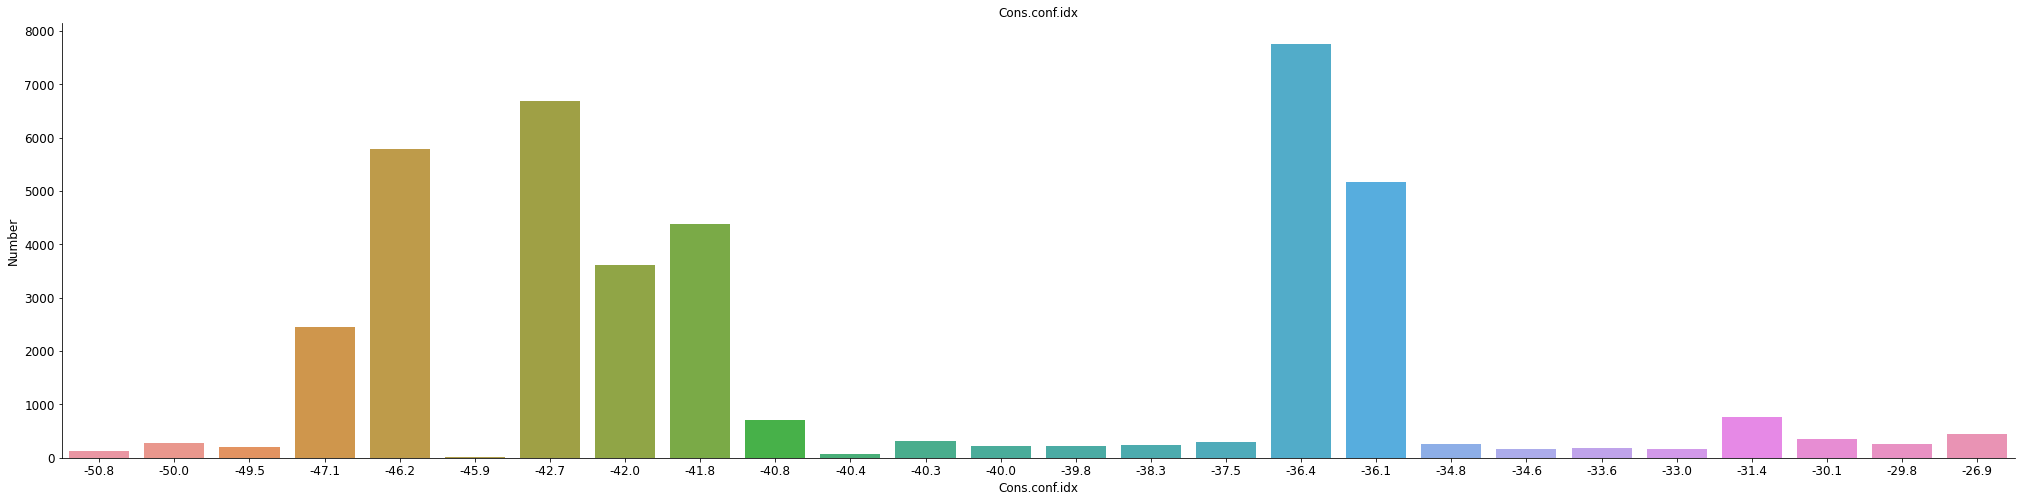

In [36]:
fig, ax = plt.subplots()
fig.set_size_inches(35, 8)
sns.countplot(x = 'cons.conf.idx', data = df[colms_num])
ax.set_xlabel('Cons.conf.idx', fontsize=12)
ax.set_ylabel('Number', fontsize=12)
ax.set_title('Cons.conf.idx', fontsize=12)
ax.tick_params(labelsize=12)
sns.despine()

In [37]:
# finding missing values

df[colms_num].isnull().sum()

campaign          0
pdays             0
previous          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
nr.employed       0
age               0
euribor3m         0
dtype: int64

# Handling Categorical Variables
Many features in the dataset may be categorical (e.g., job, marital status, education). These need to be converted into numerical representations for machine learning algorithms.

One-Hot Encoding: Use one-hot encoding for categorical variables that do not have an ordinal relationship, such as(eg. job, marital status, education). This creates binary columns for each category.

In [38]:
#Categorical Features
colms_cat = ['job', 'marital', 
       'education', 'default',
       'housing', 'loan', 'contact', 'month',
       'day_of_week', 'poutcome']
df[colms_cat].isnull().sum()

job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
poutcome       0
dtype: int64

In [39]:
# One-Hot Encoding

cols_cat = ['job', 'marital', 
       'education', 'default',
       'housing', 'loan', 'contact', 'month',
       'day_of_week', 'poutcome']
df[cols_cat]
cols_new_cat=pd.get_dummies(df[cols_cat],drop_first = False)
cols_new_cat.head()


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


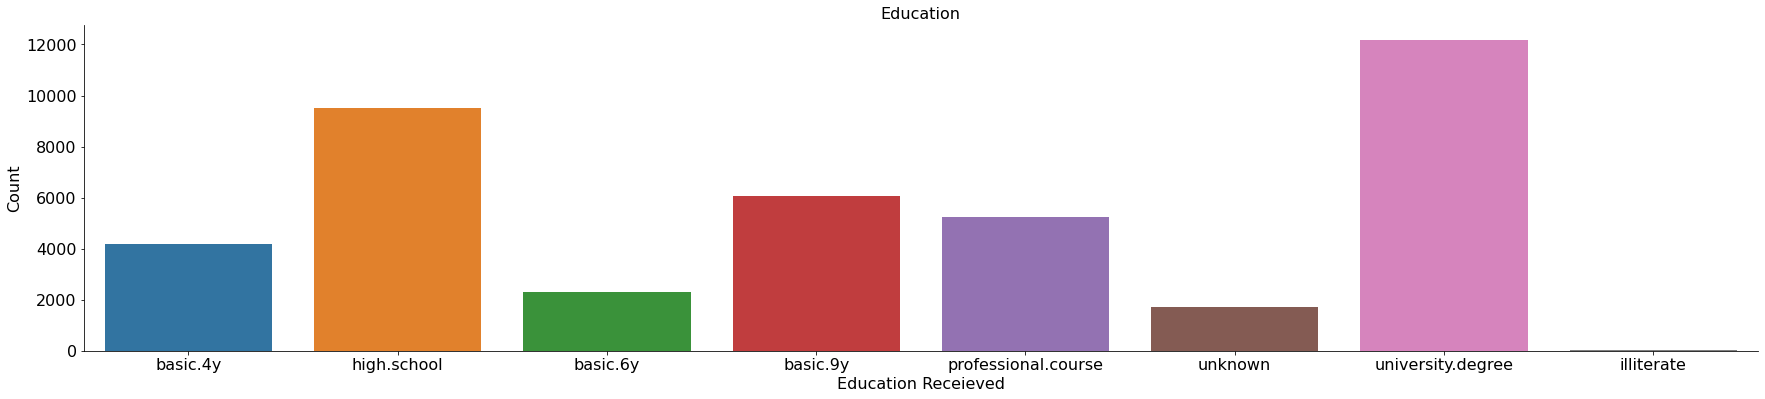

In [40]:
#Graphical Representation of Categorical Features

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
fig, ax = plt.subplots()
fig.set_size_inches(30, 6)
sns.countplot(x = 'education', data = df[colms_cat])
ax.set_xlabel('Education Receieved', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title('Education', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

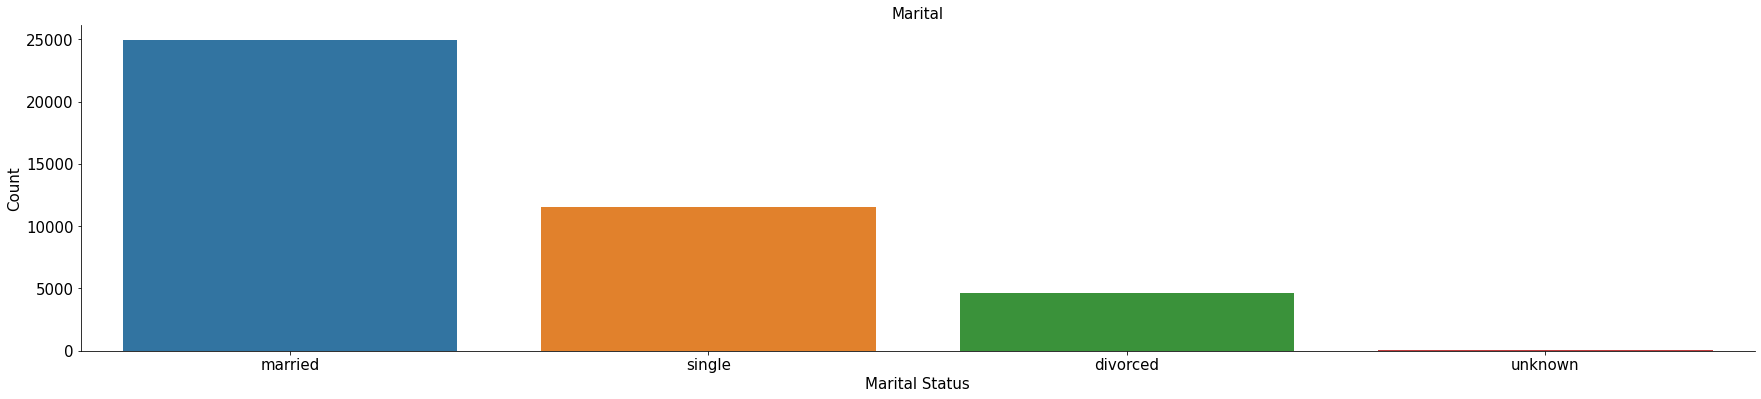

In [41]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 6)
sns.countplot(x = 'marital', data = df[colms_cat])
ax.set_xlabel('Marital Status', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Marital', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

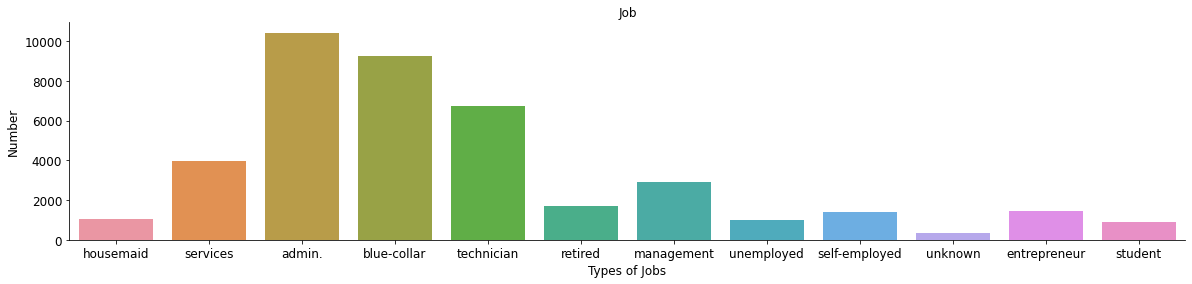

In [42]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 4)
sns.countplot(x = 'job', data = df[colms_cat])
ax.set_xlabel('Types of Jobs', fontsize=12)
ax.set_ylabel('Number', fontsize=12)
ax.set_title('Job', fontsize=12)
ax.tick_params(labelsize=12)
sns.despine()

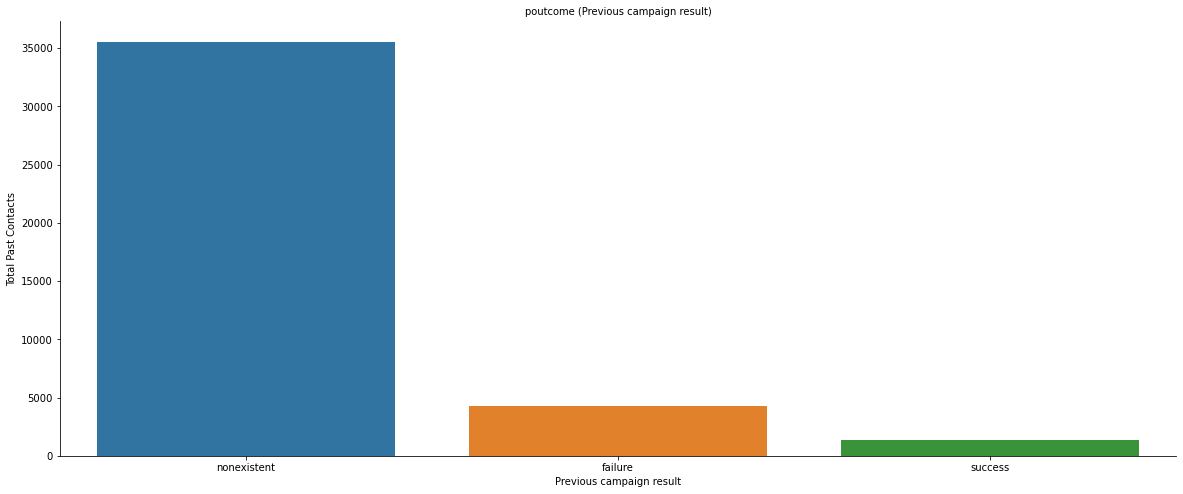

In [43]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'poutcome', data = df[colms_cat])
ax.set_xlabel('Previous campaign result', fontsize=10)
ax.set_ylabel('Total Past Contacts', fontsize=10)
ax.set_title('poutcome (Previous campaign result)', fontsize=10)
ax.tick_params(labelsize=10)
sns.despine()

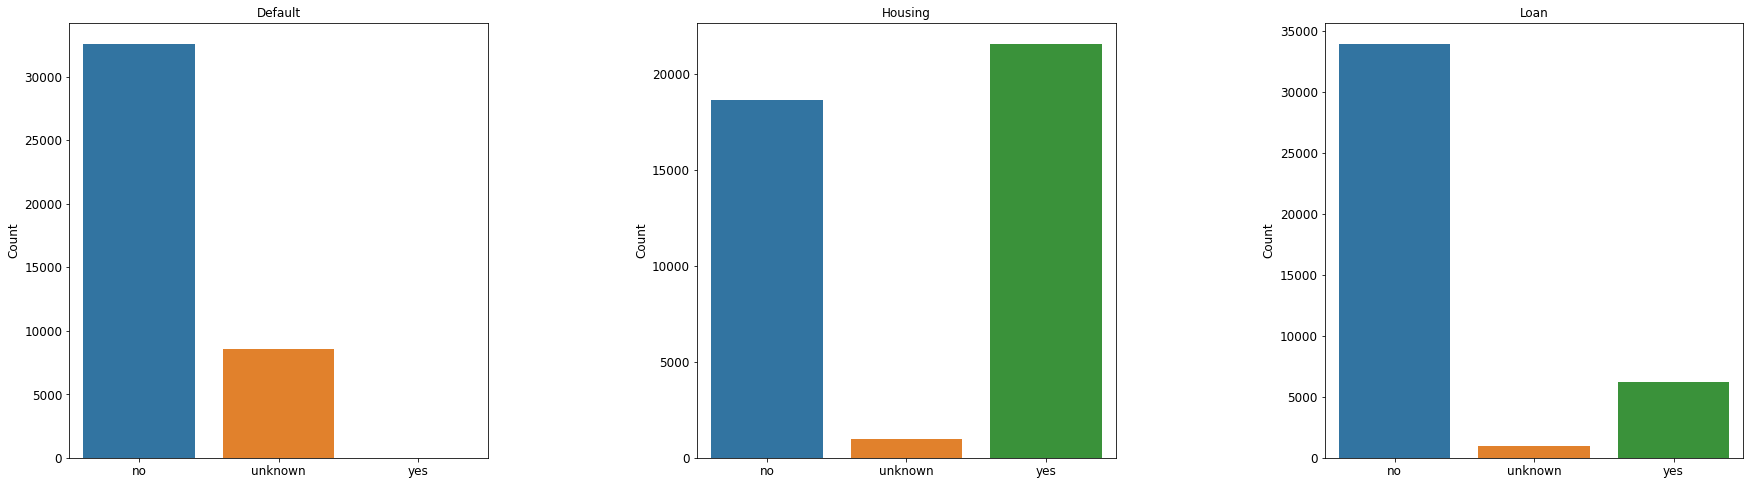

In [44]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (30,8))
sns.countplot(x = 'default', data = df[colms_cat], ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Default', fontsize=12)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=12)
ax1.tick_params(labelsize=12)

sns.countplot(x = 'housing', data = df[colms_cat], ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Housing', fontsize=12)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=12)
ax2.tick_params(labelsize=12)

sns.countplot(x = 'loan', data = df[colms_cat], ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Loan', fontsize=12)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=12)
ax3.tick_params(labelsize=12)

plt.subplots_adjust(wspace=0.5)

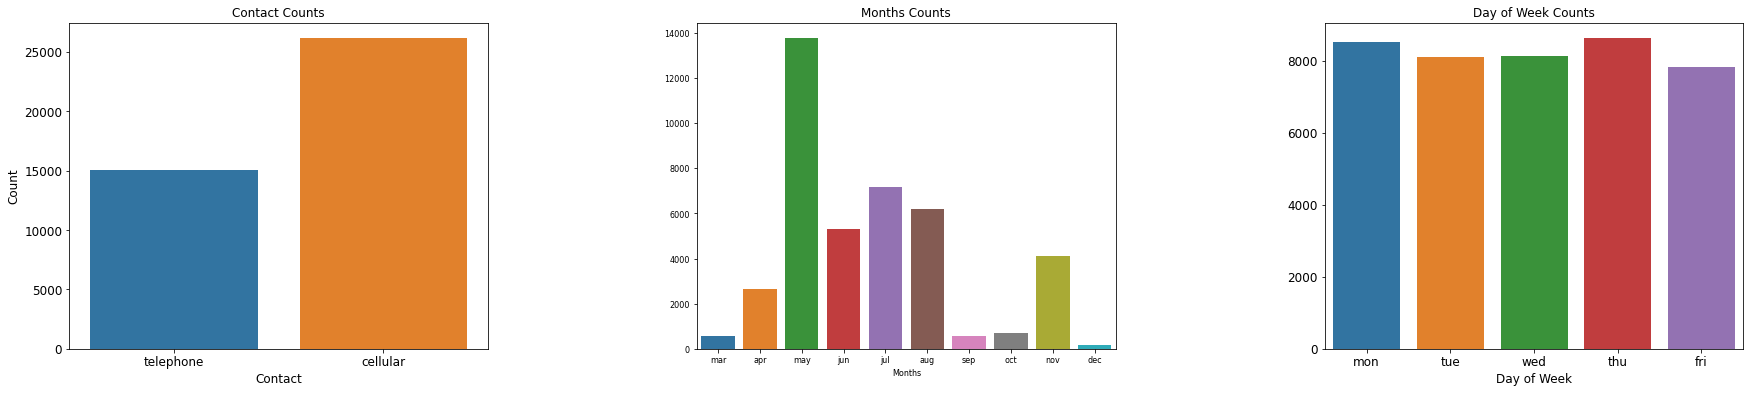

In [45]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (30,6))
sns.countplot(df[colms_cat]['contact'], ax = ax1)
ax1.set_xlabel('Contact', fontsize = 12)
ax1.set_ylabel('Count', fontsize = 12)
ax1.set_title('Contact Counts')
ax1.tick_params(labelsize=12)

sns.countplot(df[colms_cat]['month'], ax = ax2, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax2.set_xlabel('Months', fontsize = 8)
ax2.set_ylabel('')
ax2.set_title('Months Counts')
ax2.tick_params(labelsize=8)

sns.countplot(df[colms_cat]['day_of_week'], ax = ax3)
ax3.set_xlabel('Day of Week', fontsize = 12)
ax3.set_ylabel('')
ax3.set_title('Day of Week Counts')
ax3.tick_params(labelsize=12)

plt.subplots_adjust(wspace=0.5)


In [46]:
df = pd.concat([df,cols_new_cat], axis = 1)

In [47]:
cols_all_cat=list(cols_new_cat.columns)
df[cols_all_cat].head()


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [48]:
print('Total no.of features:', len(cols_all_cat+colms_num))
print('Numerical Features:',len(colms_num))
print('Categorical Features:',len(cols_all_cat))

Total no.of features: 62
Numerical Features: 9
Categorical Features: 53


In [49]:
df[colms_num+cols_all_cat].isnull().sum().sort_values(ascending = False)

campaign                 0
month_dec                0
default_no               0
default_unknown          0
default_yes              0
                        ..
education_basic.4y       0
education_basic.6y       0
education_basic.9y       0
education_high.school    0
poutcome_success         0
Length: 62, dtype: int64

In [50]:
cols_input = colms_num + cols_all_cat
df_data = df[cols_input + ['OUTPUT_LABEL']]
cols_input

['campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'nr.employed',
 'age',
 'euribor3m',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_basic.4y',
 'education_basic.6y',
 'education_basic.9y',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'default_no',
 'default_unknown',
 'default_yes',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_fri',
 'day_of_week_mon',

In [51]:
df_data.head(20)

,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,age,euribor3m,job_admin.,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,OUTPUT_LABEL
0,1,999,0,1.1,93.994,-36.4,5191.0,56,4.857,0,...,0,0,1,0,0,0,0,1,0,0
1,1,999,0,1.1,93.994,-36.4,5191.0,57,4.857,0,...,0,0,1,0,0,0,0,1,0,0
2,1,999,0,1.1,93.994,-36.4,5191.0,37,4.857,0,...,0,0,1,0,0,0,0,1,0,0
3,1,999,0,1.1,93.994,-36.4,5191.0,40,4.857,1,...,0,0,1,0,0,0,0,1,0,0
4,1,999,0,1.1,93.994,-36.4,5191.0,56,4.857,0,...,0,0,1,0,0,0,0,1,0,0
5,1,999,0,1.1,93.994,-36.4,5191.0,45,4.857,0,...,0,0,1,0,0,0,0,1,0,0
6,1,999,0,1.1,93.994,-36.4,5191.0,59,4.857,1,...,0,0,1,0,0,0,0,1,0,0
7,1,999,0,1.1,93.994,-36.4,5191.0,41,4.857,0,...,0,0,1,0,0,0,0,1,0,0
8,1,999,0,1.1,93.994,-36.4,5191.0,24,4.857,0,...,0,0,1,0,0,0,0,1,0,0
9,1,999,0,1.1,93.994,-36.4,5191.0,25,4.857,0,...,0,0,1,0,0,0,0,1,0,0


In [52]:
len(cols_input)

62

# Splitting the Dataset into Train, Validation, and Test Sets

 To effectively train and evaluate the predictive model, the dataset is partitioned into three distinct subsets: training, validation, and test sets. The training set is used to fit the model and learn the underlying patterns in the data. The validation set helps in fine-tuning model parameters and selecting the best-performing algorithm by assessing performance during the development phase. Finally, the test set is reserved for evaluating the model’s generalization ability on unseen data, ensuring a reliable estimate of real-world performance. This data splitting strategy is essential for minimizing overfitting and ensuring that the model performs well on new, incoming data.
      In this project, we will split into 60% train, 20% validation, and 20% test

In [53]:
# Shuffle the dataset and reset index
df_data = df_data.sample(frac=1, random_state=42).reset_index(drop=True)

In [54]:
# Extract 40% of the data for validation/test
df_valid_test = df_data.sample(frac=0.4, random_state=42)


In [55]:
# Display the size of the split
split_ratio = len(df_valid_test) / len(df_data)
print(f'Split size: {split_ratio:.2f}')


Split size: 0.40


In [56]:
# Split df_valid_test equally into test and validation sets
df_test = df_valid_test.sample(frac=0.5, random_state=42)
df_valid = df_valid_test.loc[~df_valid_test.index.isin(df_test.index)]


In [57]:
# Use the remaining 60% of the data as the training set
df_train_all = df_data.loc[~df_data.index.isin(df_valid_test.index)]


In [58]:
# Check the prevalence of each set
print(f"Test prevalence (n = {len(df_test)}): {calc_prevalence(df_test.OUTPUT_LABEL.values):.4f}")
print(f"Valid prevalence (n = {len(df_valid)}): {calc_prevalence(df_valid.OUTPUT_LABEL.values):.4f}")
print(f"Train all prevalence (n = {len(df_train_all)}): {calc_prevalence(df_train_all.OUTPUT_LABEL.values):.4f}")


Test prevalence (n = 8238): 0.1090
Valid prevalence (n = 8237): 0.1180
Train all prevalence (n = 24713): 0.1121


In [59]:
#The mean value from the training data:
df_mean = df_train_all[cols_input].mean(axis = 0)
# save the means
df_mean.to_csv('df_mean.csv',index=True)

In [60]:
df_mean_in = pd.read_csv('df_mean.csv', names =['col','mean_val'])
df_mean_in.head()

,col,mean_val
0,NaN,0.000000
1,campaign,2.554890
2,pdays,961.949864
3,previous,0.171286
4,emp.var.rate,0.076312


# Model Selection

 Model selection is a critical step in the machine learning workflow that involves identifying the most suitable algorithm to accurately predict whether a client will subscribe to a bank term deposit. This process begins by evaluating multiple classification models such as Logistic Regression, Decision Trees, Random Forest, Support Vector Machines (SVM), and Gradient Boosting. Each model is trained on the training dataset and assessed using the validation set to compare performance metrics like accuracy, precision, recall so on.The goal is to select a model that not only performs well on the validation data but also generalizes effectively to unseen data.

In [61]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

def print_classification_report(y_true, y_scores, threshold=0.5):
    # Convert predicted probabilities to class labels
    y_pred = (y_scores > threshold).astype(int)

    # Metrics
    auc = roc_auc_score(y_true, y_scores)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    # Specificity = TN / (TN + FP)
    tn = ((y_pred == 0) & (y_true == 0)).sum()
    fp_fn = (y_true == 0).sum()
    specificity = tn / fp_fn if fp_fn != 0 else 0

    # Prevalence = Positive cases / Total cases
    prevalence = y_true.mean()

    # Print results
    print(f"AUC:         {auc:.3f}")
    print(f"Accuracy:    {acc:.3f}")
    print(f"Precision:   {prec:.3f}")
    print(f"Recall:      {rec:.3f}")
    print(f"F1 Score:    {f1:.3f}")
    print(f"Specificity: {specificity:.3f}")
    print(f"Prevalence:  {prevalence:.3f}")

    return auc, acc, prec, rec, f1, specificity


In [62]:
 threshold=0.5


# Model Selection:

-K-nearest neighbors

-Logistic regression

-Stochastic gradient descent

-Decision tree

-Random forest

-Gradient boosting classifier

# K-Nearest Neighbors (KNN)

K-Nearest Neighbors (KNN) is a simple and intuitive supervised machine learning algorithm used for both classification and regression, though it is most commonly applied to classification tasks. The core idea behind KNN is to classify a data point based on how its neighbors are classified. When making a prediction, the algorithm calculates the distance between the input data point and all points in the training set, selects the ‘k’ nearest neighbors (where k is a user-defined number), and assigns the class most common among those neighbors.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score


#load the CSV file
data = pd.read_csv('bank-additional-full.csv')

#  Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

#  Split features and target
X = data.drop('y', axis=1)
y = data['y']

#  Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#  KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

#  Predictions and evaluation
y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8997329448895363
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94      7303
           1       0.59      0.40      0.47       935

    accuracy                           0.90      8238
   macro avg       0.76      0.68      0.71      8238
weighted avg       0.89      0.90      0.89      8238



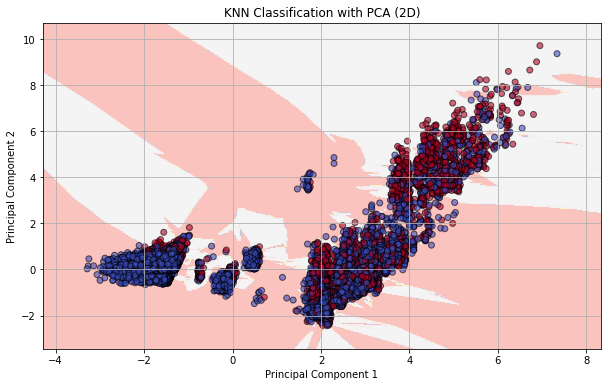

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

#load the CSV file
df = pd.read_csv('bank-additional-full.csv')

# Numerical features
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Encode target
le = LabelEncoder()
y = le.fit_transform(df['y'])  # 'no' -> 0, 'yes' -> 1

# Scale and reduce dimensions
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numerical_df)
X_pca = PCA(n_components=2).fit_transform(X_scaled)

# Split and train KNN
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Mesh grid for decision boundary
h = 0.02
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plot
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1, alpha=0.8)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolor='k', alpha=0.6)
plt.title("KNN Classification with PCA (2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


# Logistic Regression

Logistic Regression is a widely used supervised machine learning algorithm designed for binary classification problems, where the goal is to predict one of two possible outcomes—such as "yes" or "no". Unlike linear regression, which predicts continuous values, logistic regression estimates the probability that a given input belongs to a particular class using the logistic (sigmoid) function. This function maps any real-valued number into a range between 0 and 1, making it ideal for probability estimation. The model assigns weights to each feature and learns the best combination that separates the classes. Logistic regression is fast, easy to interpret, and works well when the relationship between the features and the target is approximately linear.

In [4]:
import pandas as pd
import zipfile
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

#load the CSV file
data = pd.read_csv('bank-additional-full.csv')


#  Encode categorical features
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

#  Split features and target
X = data.drop('y', axis=1)
y = data['y']

#  Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

#  Predict and evaluate
y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:, 1]  # For AUC

# Results
print(" Logistic Regression Model:\n", log_reg)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_proba))
print("\n Classification Report:\n", classification_report(y_test, y_pred))


 Logistic Regression Model:
 LogisticRegression(max_iter=1000)
Accuracy: 0.910536537994659
AUC Score: 0.9317672540989308

 Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      7303
           1       0.67      0.42      0.52       935

    accuracy                           0.91      8238
   macro avg       0.80      0.70      0.73      8238
weighted avg       0.90      0.91      0.90      8238



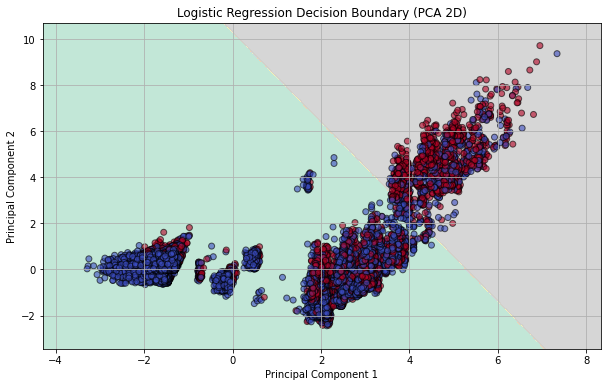

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#load the CSV file
df = pd.read_csv('bank-additional-full.csv')


# Select numerical features
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Encode target variable
le = LabelEncoder()
y = le.fit_transform(df['y'])  # 'no' -> 0, 'yes' -> 1

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numerical_df)

# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Create mesh grid
h = 0.02
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel2, alpha=0.8)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolor='k', alpha=0.6)
plt.title("Logistic Regression Decision Boundary (PCA 2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


# Stochastic Gradient Descent (SGD) 

Stochastic Gradient Descent (SGD) is an optimization algorithm commonly used to minimize a loss function in machine learning models, especially when dealing with large datasets. Unlike traditional gradient descent, which calculates gradients using the entire dataset, SGD updates model parameters using only one sample (or a small batch) at a time. This leads to faster and more frequent updates, often helping the model converge quicker, though with more variance in updates.
          

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load dataset
df = pd.read_csv("bank-additional-full.csv")

# Encode categorical features
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Features and target
X = df_encoded.drop("y", axis=1)
y = df_encoded["y"]

# Feature scaling for SGD
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model training
model = SGDClassifier(loss='log', max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluation
print("Model: Stochastic Gradient Descent (SGD) Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_proba))
print("Classification Report:\n", classification_report(y_test, y_pred))


Model: Stochastic Gradient Descent (SGD) Classifier
Accuracy: 0.9059237679048313
AUC Score: 0.9270854187093283
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      7303
           1       0.68      0.33      0.44       935

    accuracy                           0.91      8238
   macro avg       0.80      0.65      0.69      8238
weighted avg       0.89      0.91      0.89      8238



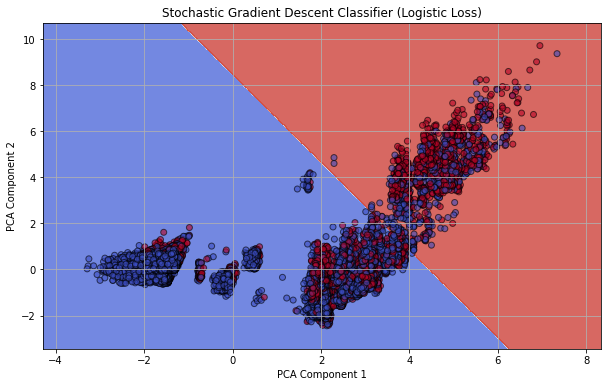

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

#load the CSV file
df = pd.read_csv('bank-additional-full.csv')

# Select numeric features
X = df.select_dtypes(include=['int64', 'float64'])

# Encode target variable
le = LabelEncoder()
y = le.fit_transform(df['y'])  # 'no' -> 0, 'yes' -> 1

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train classifier using Stochastic Gradient Descent
sgd = SGDClassifier(loss='log', max_iter=1000, tol=1e-3, random_state=42)
sgd.fit(X_train, y_train)

# Create mesh grid for decision boundary
h = 0.02
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = sgd.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and data points
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolor='k', alpha=0.6)
plt.title("Stochastic Gradient Descent Classifier (Logistic Loss)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


# Decision Tree
A decision tree is a popular machine learning model used for both classification and regression tasks. It works by recursively splitting the dataset into subsets based on the feature that best separates the data. At each internal node, the model chooses a feature and a threshold that minimizes some measure of impurity, such as Gini impurity or entropy for classification problems. The process continues until the subsets are pure enough, or a stopping criterion (e.g., a maximum tree depth) is reached. The result is a tree-like structure with leaves representing the predicted output.

In [13]:
import pandas as pd
import zipfile
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, roc_curve

#load the CSV file
df = pd.read_csv('bank-additional-full.csv')


# Encode categorical variables
df = df.copy()
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target
X = df.drop('y', axis=1)
y = df['y']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)
report = classification_report(y_test, y_pred)

# Print results
print("Model: Decision Tree Classifier")
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC Score: {auc:.4f}")
print("Classification Report:")
print(report)


Model: Decision Tree Classifier
Accuracy: 0.8894
AUC Score: 0.7259
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7303
           1       0.51      0.51      0.51       935

    accuracy                           0.89      8238
   macro avg       0.73      0.73      0.73      8238
weighted avg       0.89      0.89      0.89      8238



# Random Forest
Random Forest is an ensemble learning method that combines multiple decision trees to improve the accuracy and robustness of predictions. It works by creating many individual decision trees, each trained on a random subset of the training data, using a technique called bootstrap aggregating (or bagging). Additionally, at each split within the tree, a random subset of features is considered, which introduces more diversity into the trees and helps prevent overfitting.

The final prediction is made by aggregating the predictions of all the individual trees, typically by taking the majority vote for classification tasks or the average for regression tasks. The strength of Random Forest lies in its ability to reduce the variance and overfitting associated with individual decision trees while still maintaining interpretability.

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("bank-additional-full.csv")

# Encode categorical variables
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Define features and target
X = df_encoded.drop("y", axis=1)
y = df_encoded["y"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluation
print("Model: Random Forest Classifier")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"AUC Score: {roc_auc_score(y_test, y_proba):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Model: Random Forest Classifier
Accuracy: 0.9133
AUC Score: 0.9434
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7303
           1       0.65      0.51      0.57       935

    accuracy                           0.91      8238
   macro avg       0.79      0.74      0.76      8238
weighted avg       0.91      0.91      0.91      8238



# The Gradient Boosting Classifier (GBC)

The Gradient Boosting Classifier (GBC) is an ensemble learning method that builds a strong predictive model by combining multiple weak learners, typically decision trees. Unlike Random Forests, which build trees independently, Gradient Boosting works by constructing trees sequentially. Each tree is trained to correct the errors made by the previous tree in the sequence.

The process begins with an initial prediction, usually the mean or median of the target variable. In each subsequent iteration, a new tree is added that attempts to reduce the residual errors (the difference between the predicted and actual values) of the previous model. This is done by fitting the new tree to the gradients (or residuals) of the loss function.

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Load dataset
df = pd.read_csv("bank-additional-full.csv")

# Encode categorical variables
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Define features and target
X = df_encoded.drop("y", axis=1)
y = df_encoded["y"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Gradient Boosting Classifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluation
print("Model: Gradient Boosting Classifier")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"AUC Score: {roc_auc_score(y_test, y_proba):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Model: Gradient Boosting Classifier
Accuracy: 0.9198
AUC Score: 0.9483
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      7303
           1       0.69      0.52      0.60       935

    accuracy                           0.92      8238
   macro avg       0.82      0.75      0.78      8238
weighted avg       0.91      0.92      0.91      8238



In [19]:
#Analyze results baseline models

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Load and encode data
df = pd.read_csv("bank-additional-full.csv")

# Encode categorical columns
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Define X and y
X = df.drop("y", axis=1)
y = df["y"]

# Scale data for models like SGD
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SGD Classifier": SGDClassifier(loss='log', max_iter=1000, random_state=42)
}

# Evaluate each model
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    report = classification_report(y_test, y_pred, output_dict=True)
    f1 = report['weighted avg']['f1-score']

    results.append({
        "Model": name,
        "Accuracy": round(accuracy, 4),
        "AUC Score": round(auc, 4),
        "F1 Score": round(f1, 4)
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results).sort_values(by="AUC Score", ascending=False)
print("\nBaseline Model Performance:")
print(results_df.to_string(index=False))



Baseline Model Performance:
              Model  Accuracy  AUC Score  F1 Score
  Gradient Boosting    0.9198     0.9483    0.9148
      Random Forest    0.9130     0.9433    0.9085
Logistic Regression    0.9105     0.9318    0.9014
     SGD Classifier    0.9059     0.9271    0.8909
      Decision Tree    0.8888     0.7228    0.8887


# conclusion

In this project , I developed a ML model to predict the likelyhood of clients subscribing to a bank term deposit. Among several model evaluated , the Gradient Boosting Classifier with optimized hyperparameters delivered the best performance, achieving an accuracy of 91.98%. 